In [7]:
import os, seaborn as sns, pandas as pd, numpy as np
from colorsetup import colors, palette


In [9]:
os.chdir('data')

In [10]:
sns.set_palette(palette)

In [11]:
filepath = 'Human_Activity_Recognition_Using_Smartphones_Data.csv'

In [12]:
data = pd.read_csv(filepath, sep=',')

In [13]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [15]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

In [17]:
data.iloc[:,:-1].min().value_counts()

-1.0      561
LAYING      1
dtype: int64

In [18]:
data.iloc[:,:-1].max().value_counts()

1.0    561
dtype: int64

In [19]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

5473     5
8983     3
1204     1
2515     4
10199    0
Name: Activity, dtype: int64

In [23]:
data['Activity'].value_counts()

0    1944
2    1906
1    1777
3    1722
5    1544
4    1406
Name: Activity, dtype: int64

In [24]:
feature_cols = data.columns[:-1]

In [25]:
corr_values = data[feature_cols].corr()

In [26]:
corr_values.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,0.004590,-0.046352,-0.024185,1.000000,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,-0.016785,-0.046996,-0.023745,0.922525,1.000000,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511


In [27]:
tri_index = np.tril_indices_from(corr_values)

In [28]:
tri_index

(array([  0,   1,   1, ..., 560, 560, 560], dtype=int64),
 array([  0,   0,   1, ..., 558, 559, 560], dtype=int64))

In [30]:
corr_array = np.array(corr_values)
corr_array[tri_index] = np.nan
corr_array

array([[        nan,  0.12803651, -0.23030174, ..., -0.0410214 ,
         0.03405337,  0.03065649],
       [        nan,         nan, -0.02988185, ..., -0.00751341,
        -0.00561596, -0.01623272],
       [        nan,         nan,         nan, ...,  0.00321537,
        -0.01298607, -0.02840566],
       ...,
       [        nan,         nan,         nan, ...,         nan,
        -0.7482494 , -0.63523058],
       [        nan,         nan,         nan, ...,         nan,
                nan,  0.54561424],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [32]:
corr_values = pd.DataFrame(corr_array, columns=corr_values.columns, index=corr_values.index)

In [39]:
corr_values = corr_values.stack().to_frame().reset_index().rename(columns = {'level_0':'feature1','level_1': 'feature2',0:'correlation'})

In [40]:
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matploylib inline

UsageError: Line magic function `%matploylib` not found.


In [42]:
sns.set_context('talk')
sns.set_style('white')

[Text(0,0.5,'Frequency'), Text(0.5,0,'Absolute Correlation')]

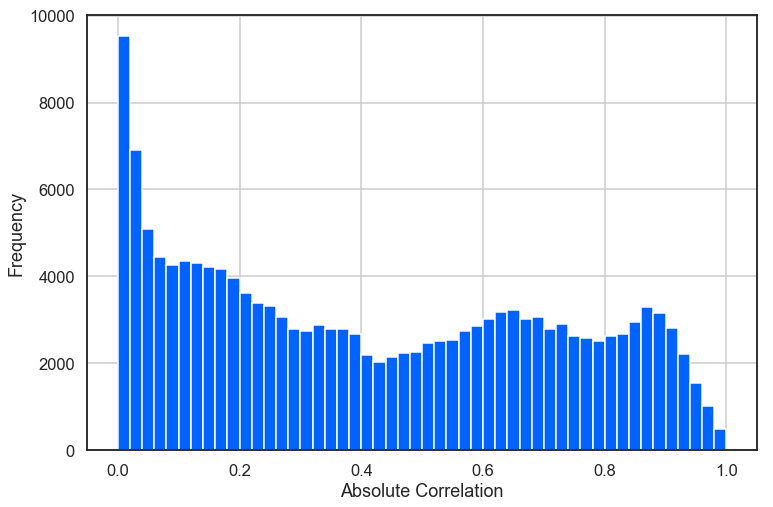

In [43]:
ax = corr_values['abs_correlation'].hist(bins = 50, figsize = (12,8))
ax.set(xlabel = 'Absolute Correlation', ylabel = 'Frequency')

In [47]:
corr_values.sort_values('correlation', ascending = False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
92472,tBodyAccMag-std(),tGravityAccMag-std(),1.000000,1.000000
156049,fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-sma(),1.000000,1.000000
95316,tBodyAccMag-arCoeff()1,tGravityAccMag-arCoeff()1,1.000000,1.000000
93189,tBodyAccMag-max(),tGravityAccMag-max(),1.000000,1.000000
95667,tBodyAccMag-arCoeff()2,tGravityAccMag-arCoeff()2,1.000000,1.000000


In [48]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 99)

In [51]:
train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

In [53]:
x_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']
x_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'Activity']

In [54]:
y_train.value_counts(normalize = True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [55]:
y_test.value_counts(normalize = True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lc = LogisticRegression(solver = 'liblinear')

In [59]:
lc.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
from sklearn.linear_model import LogisticRegressionCV
lc_l1 = LogisticRegressionCV(Cs = 10, cv =4, penalty = 'l1',solver = 'liblinear')
lc_l1.fit(x_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=4, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [65]:
lc_l2 = LogisticRegressionCV(Cs = 10, cv =4, penalty = 'l2',solver = 'liblinear')
lc_l2.fit(x_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=4, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [72]:
coefficients = list()

In [68]:
coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lc, lc_l1, lc_l2]

In [73]:
for lab, mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels = [[lab],[0,1,2,3,4,5]]
                                , labels = [[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns = coeff_label))
coefficients = pd.concat(coefficients, axis = 1)

In [74]:
coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
120  0.050644 -0.433616  0.156688 -0.146193 -0.070387  0.191318  0.000000   
315 -0.011200  0.127788  0.119143 -0.219397  0.131793 -0.057875 -0.051505   
254 -0.013807 -0.098248  0.201622  0.075110  0.014776 -0.233238 -0.019764   
64  -0.014915 -0.588553  0.914927  0.154960  0.426318 -0.357750 -0.025728   
532  0.051594  0.669315 -0.390983 -0.278011  0.402973  0.148891 -0.023167   
54   0.090923  0.874219 -0.810587  0.072621  0.160158 -0.371680 -0.463535   
282 -0.031966 -0.009488 -0.135521 -0.118435 -0.214577 -0.099404 -0.022095   
145 -0.124213  2.182536 -2.160635  0.071193 -0.785720  0.229111  0.000000   
191  0.140326 -0.033584 -0.228144 -0.125503 -0.056055 -0.315737  1.541299   
349 -0.030609  0.039692 -0.179789  0.216972  0.128665 -0.332473 -0.044737   

                                                             l2            \
            1         2         3         4         5         0         1   
120 -2.468044  0.000000  0.000000  0.000000  0.786980  0.000000 -2.529133   
315  0.000000  0.000000 -0.172027  0.199768  0.074042  0.032898  0.000000   
254  0.000000  0.000000  0.000000  0.000000 -0.560087  0.002643  0.000000   
64  -0.637532  1.354312  0.461539  0.690773 -0.330567 -0.343344 -0.653629   
532  0.939051  0.000000 -0.042168  0.446706  0.455152  0.000000  0.971091   
54   0.296320  0.000000  0.000000  0.179053 -0.348989  0.085746  0.121477   
282  0.000000  0.000000 -0.045380  0.000000 -0.118865  0.020223  0.000000   
145  5.266836 -3.571210  0.000000 -1.646742  1.472317 -0.784142  5.509255   
191  0.000000  0.000000  0.000000  0.000000 -4.728672  1.324278  0.000000   
349  0.000000  0.000000  0.000000  0.169853 -0.388874 -0.114031  0.000000   

                                             
            2         3         4         5  
120  0.000000  0.000000  0.000000  0.677786  
315  0.000000 -0.021301  0.265972 -0.034841  
254  0.000000  0.000000  0.000000 -0.342930  
64   1.353265  0.362567  0.722864 -0.358285  
532  0.000000 -0.067791  0.657103  0.507739  
54   0.000000  0.000000  0.205818 -0.449549  
282  0.000000 -0.077542 -0.044887 -0.471932  
145 -3.665756  0.000000 -1.643701  1.075701  
191  0.000000  0.000000  0.000000 -5.032518  
349  0.000000  0.000000  0.079696 -0.403469

In [75]:
coefficients.shape

(561, 18)

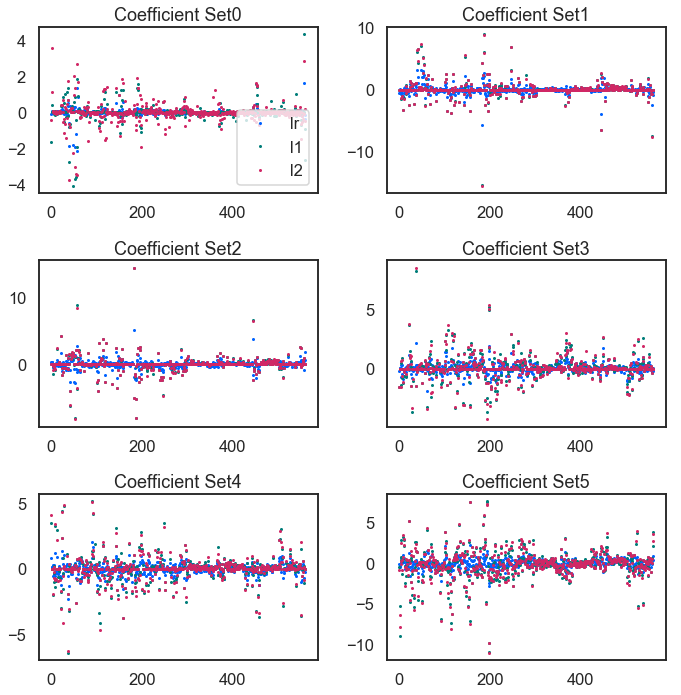

In [81]:
fig, axList = plt.subplots(3,2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for loc, ax in enumerate(axList):
    data = coefficients.xs(loc, level = 1, axis = 1)
    data.plot(marker = 'o', ls = '', ms = 2.0, ax=ax, legend = False)
    if ax is axList[0]:
        ax.legend(loc=4)
    ax.set(title = 'Coefficient Set' + str(loc))
plt.tight_layout()

In [84]:
coeff_label

MultiIndex(levels=[['l2'], [0, 1, 2, 3, 4, 5]],
           labels=[[0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5]])

In [86]:
y_pred = list()
y_prob = list()

for lab, mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(x_test), name = lab))
    coeff_label = pd.MultiIndex(levels = [[lab],[0,1,2,3,4,5]]
                                , labels = [[0,0,0,0,0,0], [0,1,2,3,4,5]])
    y_prob.append(pd.DataFrame(mod.predict_proba(x_test), columns = coeff_label))

y_pred = pd.concat(y_pred, axis = 1)
y_prob = pd.concat(y_prob, axis = 1)

In [88]:
y_pred.sample(10)

,lr,l1,l2
827,3,3,3
180,1,1,1
2902,3,3,3
3070,0,0,0
1112,3,3,3
496,0,0,0
2858,2,2,2
1054,0,0,0
2307,0,0,0
2341,0,0,0


In [89]:
y_prob.sample(10)

lr                                                                \
             0             1         2             3         4             5   
1579  0.000027  9.800779e-01  0.019844  4.706534e-05  0.000004  1.328080e-07   
1325  0.000019  3.525542e-07  0.000051  1.238166e-02  0.000490  9.870572e-01   
1914  0.000011  4.091331e-02  0.958142  6.549181e-04  0.000099  1.804491e-04   
1639  0.000047  9.286319e-01  0.071248  6.058028e-05  0.000013  5.919400e-08   
196   0.000039  6.545866e-02  0.934501  2.480997e-07  0.000001  2.025189e-10   
1559  0.000065  6.647175e-04  0.999264  3.398092e-06  0.000002  3.338057e-07   
876   0.000050  3.997025e-03  0.995872  4.593735e-07  0.000081  2.659076e-11   
1566  0.000042  9.700751e-01  0.029875  6.677570e-08  0.000008  7.028188e-09   
619   0.000119  1.865234e-05  0.004581  3.482071e-04  0.001404  9.935286e-01   
2677  0.000022  6.394624e-07  0.000036  9.705978e-01  0.028598  7.455643e-04   

                l1                                                          \
                 0             1             2             3             4   
1579  2.559740e-07  9.992232e-01  7.763766e-04  1.374263e-07  3.734698e-10   
1325  4.939098e-06  8.149644e-10  1.924235e-06  1.149122e-03  7.970052e-07   
1914  1.624523e-07  4.547421e-02  9.545243e-01  1.342412e-06  2.752892e-08   
1639  6.039950e-07  9.799354e-01  2.006388e-02  8.203278e-08  8.941551e-09   
196   1.204526e-07  1.231926e-02  9.876806e-01  7.515077e-13  2.601475e-11   
1559  2.962903e-06  3.931911e-05  9.999577e-01  1.571391e-11  1.940909e-11   
876   3.983279e-07  4.816802e-04  9.995176e-01  1.463917e-13  3.055816e-07   
1566  8.239295e-08  9.971146e-01  2.885306e-03  7.454251e-15  9.107267e-10   
619   1.506437e-05  1.778636e-07  7.689330e-04  1.994629e-07  7.591612e-06   
2677  1.376675e-06  4.264991e-08  3.782683e-07  9.979711e-01  2.027098e-03   

                              l2                                            \
                 5             0             1             2             3   
1579  9.012370e-16  8.531767e-08  9.991984e-01  8.014222e-04  6.505319e-08   
1325  9.988432e-01  1.977055e-06  7.650150e-10  1.823268e-06  9.367556e-04   
1914  8.310396e-09  8.861490e-09  4.249695e-02  9.575020e-01  1.022876e-06   
1639  3.883759e-18  4.229478e-07  9.792886e-01  2.071089e-02  5.227245e-08   
196   8.285581e-23  1.337584e-07  1.240228e-02  9.875976e-01  1.824990e-13   
1559  1.725148e-16  2.665843e-07  3.832469e-05  9.999614e-01  5.362562e-12   
876   2.022450e-25  2.912361e-07  4.718045e-04  9.995274e-01  4.327904e-14   
1566  4.326563e-19  1.756279e-08  9.970110e-01  2.989025e-03  1.001517e-15   
619   9.992080e-01  6.322575e-06  1.808089e-07  7.457042e-04  1.296475e-07   
2677  1.353091e-08  1.178289e-06  4.467526e-08  4.341807e-07  9.984632e-01   

                                  
                 4             5  
1579  5.605019e-10  4.805030e-16  
1325  5.932015e-07  9.990589e-01  
1914  2.382845e-08  5.845581e-09  
1639  1.385596e-08  2.930536e-18  
196   8.952479e-11  7.647913e-23  
1559  6.483719e-11  1.421174e-16  
876   5.234049e-07  1.112944e-25  
1566  1.736597e-09  1.890890e-19  
619   1.017985e-05  9.992375e-01  
2677  1.535109e-03  3.549452e-08

In [92]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()


In [94]:
for lab in coeff_labels:
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average = 'weighted')
    accuracy = accuracy_score(y_test, y_pred[lab])
    auc = roc_auc_score(label_binarize(y_test, classes = [0,1,2,3,4,5]),y_prob[lab] , average = 'weighted')
    
    cm[lab] = confusion_matrix(y_test,y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 'fscore':fscore, 'acurracy':accuracy, 'auc':auc}, name = lab))

metrics = pd.concat(metrics, axis = 1)

In [95]:
metrics

,lr,l1,l2
precision,0.985117,0.984180,0.984180
recall,0.985113,0.984142,0.984142
fscore,0.985113,0.984133,0.984133
acurracy,0.985113,0.984142,0.984142
auc,0.999327,0.999299,0.999297


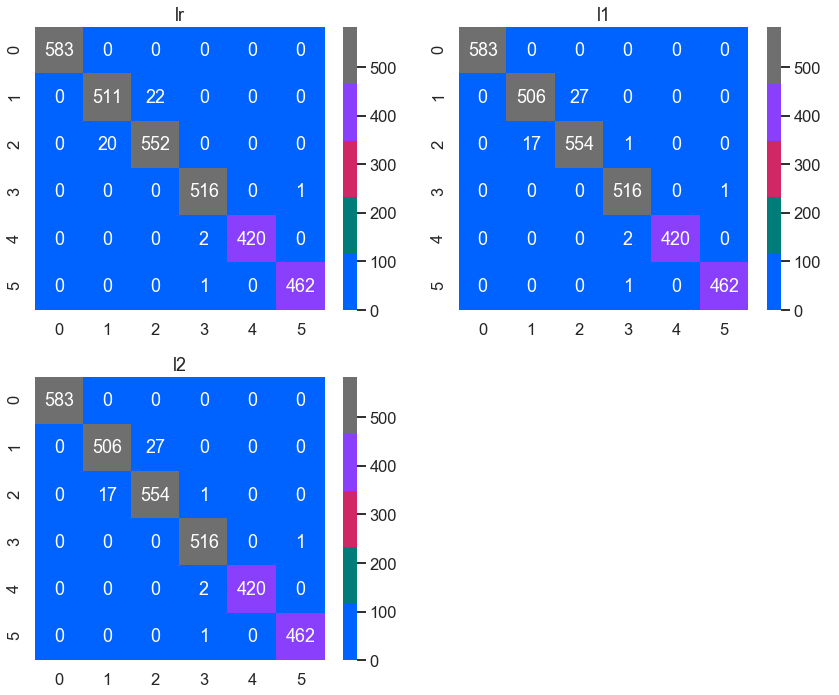

In [97]:
fig, axList = plt.subplots(nrows =2,ncols =2)
axList = axList.flatten()
fig.set_size_inches(12,10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
        sns.heatmap(cm[lab], ax = ax, annot = True, fmt = 'd', cmap = colors);
        ax.set(title = lab);
plt.tight_layout()
            